In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/health_fitness_dataset.csv')

print(df)


        participant_id        date  age gender  height_cm  weight_kg  \
0                    1  2024-01-01   56      F      165.3       53.7   
1                    1  2024-01-04   56      F      165.3       53.9   
2                    1  2024-01-05   56      F      165.3       54.2   
3                    1  2024-01-07   56      F      165.3       54.4   
4                    1  2024-01-09   56      F      165.3       54.7   
...                ...         ...  ...    ...        ...        ...   
687696            3000  2024-12-19   38      F      165.7      112.9   
687697            3000  2024-12-20   38      F      165.7      113.1   
687698            3000  2024-12-21   38      F      165.7      113.4   
687699            3000  2024-12-22   38      F      165.7      113.6   
687700            3000  2024-12-23   38      F      165.7      113.9   

          activity_type  duration_minutes intensity  calories_burned  ...  \
0               Dancing                41       Low       

# Dataset description


In [ ]:
#How many features
print(f"There are {df.shape[1]} features in the dataset")
#classification or regression
print("Classification problem because we are predicting discrete values")
# How many data points?
print(f"There are {df.size} data points in the dataset")
print(set(df.dtypes))

#Appply heatmap
#Correlation after encoding data

There are 22 features in the dataset
Classification problem because we are predicting discrete values
There are 15129422 data points in the dataset
{dtype('float64'), dtype('int64'), dtype('O')}


In [ ]:
df["intensity"] == "Medium"

,intensity
0,False
1,False
2,True
3,True
4,True
...,...
687696,True
687697,False
687698,False
687699,True


In [ ]:
#equal number of instances or not?
df["gender"].value_counts()

,count
gender,
F,338856
M,334023
Other,14822


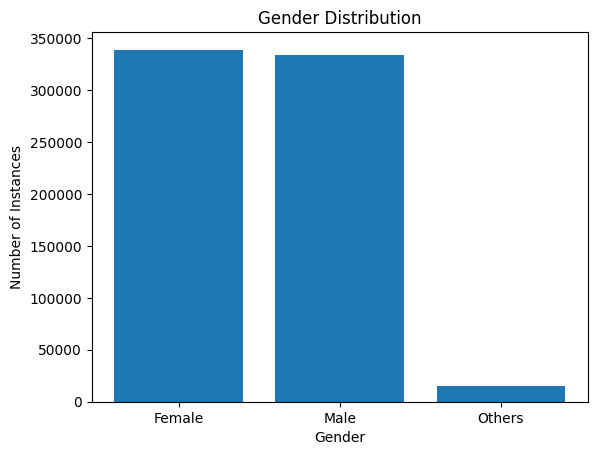

In [ ]:

labels = ["Female","Male","Others"]
values = [338856,334023,14822]
plt.bar(labels, values)
plt.xlabel("Gender")
plt.ylabel("Number of Instances")
plt.title("Gender Distribution")
plt.show()

# Dataset pre-proccessing

In [ ]:
# Null vals
print(df.isna().sum())

#catagorical vals
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

participant_id                   0
date                             0
age                              0
gender                           0
height_cm                        0
weight_kg                        0
activity_type                    0
duration_minutes                 0
intensity                        0
calories_burned                  0
avg_heart_rate                   0
hours_sleep                      0
stress_level                     0
daily_steps                      0
hydration_level                  0
bmi                              0
resting_heart_rate               0
blood_pressure_systolic          0
blood_pressure_diastolic         0
health_condition            490275
smoking_status                   0
fitness_level                    0
dtype: int64
Index(['date', 'gender', 'activity_type', 'intensity', 'health_condition',
       'smoking_status'],
      dtype='object')


#Dealing with null values


In [ ]:
print(len(df))


687701


In [ ]:
null_rows = df.isnull().any(axis=1).sum()
print(null_rows)
print(len(df)-null_rows)

490275
197426


In [ ]:
null_cols = df.columns[df.isnull().any()].tolist()
print(null_cols)

['health_condition']


In [ ]:
print(df["health_condition"].unique())

[nan 'Diabetes' 'Hypertension' 'Asthma']


In [ ]:
#replacing null values with values

for col in null_cols:

  if df[col].dtype == 'object':   # datatype = catagorical
    df[col].fillna(df[col].mode()[0], inplace=True)

  else:        # datatype = numerical
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-16-7c7f123ea3bc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.head()

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,...,3,7128,1.5,19.6,69.5,110.7,72.9,Hypertension,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,...,7,7925,1.8,19.6,69.5,110.7,72.9,Hypertension,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,...,7,7557,2.7,19.6,69.5,110.7,72.9,Hypertension,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,...,8,11120,2.6,19.6,69.5,110.7,72.9,Hypertension,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,...,1,5406,1.5,19.6,69.5,110.7,72.9,Hypertension,Never,0.33


In [ ]:
df.isna().sum()

,0
participant_id,0
date,0
age,0
gender,0
height_cm,0
weight_kg,0
activity_type,0
duration_minutes,0
intensity,0
calories_burned,0


#Dealing with Catagorical Val

In [ ]:
print(non_numeric_cols)

Index(['date', 'gender', 'activity_type', 'intensity', 'health_condition',
       'smoking_status'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in non_numeric_cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.dtypes

,0
participant_id,int64
date,int64
age,int64
gender,int64
height_cm,float64
weight_kg,float64
activity_type,int64
duration_minutes,int64
intensity,int64
calories_burned,float64


#Feature Scaling

In [ ]:
for col in df.columns.to_list():
  col_var = np.var(df[col])
  print(f"{col}: {round(col_var,2)}")

participant_id: 749950.09
date: 10589.72
age: 184.46
gender: 0.29
height_cm: 83.55
weight_kg: 504.53
activity_type: 8.3
duration_minutes: 849.56
intensity: 0.61
calories_burned: 99.71
avg_heart_rate: 317.36
hours_sleep: 0.94
stress_level: 7.67
daily_steps: 4222018.58
hydration_level: 0.34
bmi: 12.73
resting_heart_rate: 25.75
blood_pressure_systolic: 100.18
blood_pressure_diastolic: 67.89
health_condition: 0.25
smoking_status: 0.56
fitness_level: 30.28


In [ ]:
features = df.drop("gender", axis=1).columns.to_list()
print(features)

['participant_id', 'date', 'age', 'height_cm', 'weight_kg', 'activity_type', 'duration_minutes', 'intensity', 'calories_burned', 'avg_heart_rate', 'hours_sleep', 'stress_level', 'daily_steps', 'hydration_level', 'bmi', 'resting_heart_rate', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'health_condition', 'smoking_status', 'fitness_level']


In [ ]:
df.head()

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,0,56,0,165.3,53.7,2,41,1,3.3,...,3,7128,1.5,19.6,69.5,110.7,72.9,2,2,0.04
1,1,3,56,0,165.3,53.9,5,28,1,2.9,...,7,7925,1.8,19.6,69.5,110.7,72.9,2,2,0.07
2,1,4,56,0,165.3,54.2,5,21,2,2.6,...,7,7557,2.7,19.6,69.5,110.7,72.9,2,2,0.09
3,1,6,56,0,165.3,54.4,8,99,2,10.7,...,8,11120,2.6,19.6,69.5,110.7,72.9,2,2,0.21
4,1,8,56,0,165.3,54.7,5,100,2,12.7,...,1,5406,1.5,19.6,69.5,110.7,72.9,2,2,0.33


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,-1.730702,-1.630422,1.055931,0,-0.359673,-1.835205,-0.870050,-0.995349,-0.383885,-1.209879,...,-0.813129,-0.730195,-1.725978,-0.878027,-0.100609,-0.929298,-0.884539,0.380824,0.735069,-1.723750
1,-1.730702,-1.601270,1.055931,0,-0.359673,-1.826301,0.171308,-1.441361,-0.383885,-1.249937,...,0.630900,-0.342314,-1.207888,-0.878027,-0.100609,-0.929298,-0.884539,0.380824,0.735069,-1.718298
2,-1.730702,-1.591552,1.055931,0,-0.359673,-1.812945,0.171308,-1.681521,0.897187,-1.279980,...,0.630900,-0.521411,0.346383,-0.878027,-0.100609,-0.929298,-0.884539,0.380824,0.735069,-1.714663
3,-1.730702,-1.572117,1.055931,0,-0.359673,-1.804041,1.212666,0.994548,0.897187,-0.468808,...,0.991908,1.212616,0.173686,-0.878027,-0.100609,-0.929298,-0.884539,0.380824,0.735069,-1.692855
4,-1.730702,-1.552682,1.055931,0,-0.359673,-1.790685,0.171308,1.028857,0.897187,-0.268518,...,-1.535144,-1.568251,-1.725978,-0.878027,-0.100609,-0.929298,-0.884539,0.380824,0.735069,-1.671046


In [ ]:
for col in df.columns.to_list():
  col_var = np.var(df[col])
  print(f"{col}: {round(col_var,2)}")

participant_id: 1.0
date: 1.0
age: 1.0
gender: 0.29
height_cm: 1.0
weight_kg: 1.0
activity_type: 1.0
duration_minutes: 1.0
intensity: 1.0
calories_burned: 1.0
avg_heart_rate: 1.0
hours_sleep: 1.0
stress_level: 1.0
daily_steps: 1.0
hydration_level: 1.0
bmi: 1.0
resting_heart_rate: 1.0
blood_pressure_systolic: 1.0
blood_pressure_diastolic: 1.0
health_condition: 1.0
smoking_status: 1.0
fitness_level: 1.0


#Dataset splitting

In [ ]:
df["gender"].value_counts()

,count
gender,
0,338856
1,334023
2,14822


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("gender", axis=1).values
y = df["gender"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features (X) and target (y)
X = df.drop(columns=['gender'])  # All columns except the target 'gender'
y = df['gender']                 # Target column 'gender'

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred_naive = model.predict(X_test)

# Evaluation metrics
accuracy_naive = accuracy_score(y_test, y_pred_naive)
conf_matrix_naive = confusion_matrix(y_test, y_pred_naive)
report_naive = classification_report(y_test, y_pred_naive)

print("Accuracy:", accuracy_naive)
print("Confusion Matrix:\n", conf_matrix_naive)
print("Classification Report:\n", report_naive)



Accuracy: 0.8088274498209015
Confusion Matrix:
 [[86769 14888     0]
 [20106 80101     0]
 [ 2443  2004     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82    101657
           1       0.83      0.80      0.81    100207
           2       0.00      0.00      0.00      4447

    accuracy                           0.81    206311
   macro avg       0.54      0.55      0.54    206311
weighted avg       0.79      0.81      0.80    206311



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your dataset and 'target_column' is the name of your target column
X = df.drop(columns=['gender'])  # Replace 'target_column' with the actual target column name
y = df['gender']                # Replace 'target_column' with the actual target column name

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred_dec = model.predict(X_test)

# Evaluation metrics
accuracy_dec = accuracy_score(y_test, y_pred_dec)
conf_matrix_dec = confusion_matrix(y_test, y_pred_dec)
report_dec = classification_report(y_test, y_pred_dec)

print("Accuracy:", accuracy_dec)
print("Confusion Matrix:\n", conf_matrix_dec)
print("Classification Report:\n", report_dec)


Accuracy: 1.0
Confusion Matrix:
 [[101542      0      0]
 [     0 100288      0]
 [     0      0   4481]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    101542
           1       1.00      1.00      1.00    100288
           2       1.00      1.00      1.00      4481

    accuracy                           1.00    206311
   macro avg       1.00      1.00      1.00    206311
weighted avg       1.00      1.00      1.00    206311



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code
X = df.drop(columns=['gender'])  # Replace 'target_column' with the actual target column name
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train KNN model

knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Evaluation metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)
print("KNN Classification Report:\n", report_knn)

KNN Accuracy: 0.8915520742956022
KNN Confusion Matrix:
 [[93147  8297    98]
 [11095 89078   115]
 [ 1548  1221  1712]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90    101542
           1       0.90      0.89      0.90    100288
           2       0.89      0.38      0.53      4481

    accuracy                           0.89    206311
   macro avg       0.89      0.73      0.78    206311
weighted avg       0.89      0.89      0.89    206311



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score

# Assuming X_train, X_test, y_train, y_test are already defined
X = df.drop(columns=['gender'])  # Replace 'target_column' with the actual target column name
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Evaluation metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
f2_score_knn = fbeta_score(y_test, y_pred_knn, beta=2)

print("KNN Accuracy:", accuracy_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)
print("KNN Classification Report:\n", report_knn)
print("KNN F2 Score:", f2_score_knn)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# Model Training and Testing

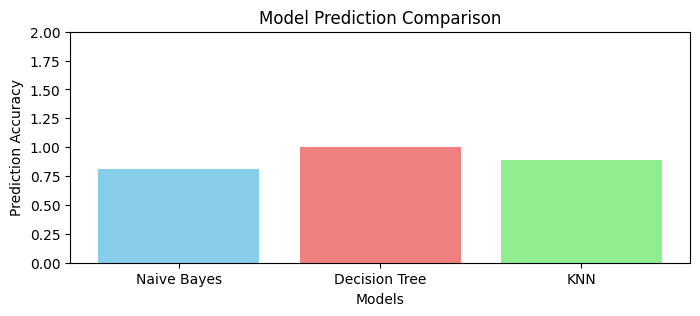

In [ ]:
# Bar chart comparison of accuracy

models = ['Naive Bayes', 'Decision Tree', 'KNN']
predictions = [accuracy_naive, accuracy_dec, accuracy_knn]

plt.figure(figsize=(8, 3))
plt.bar(models, predictions, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Prediction Accuracy")
plt.title("Model Prediction Comparison")
plt.ylim(0, 2)  # Set y-axis limit for better visualization
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes - Precision: 0.48, Recall: 0.49
Decision Tree - Precision: 1.00, Recall: 1.00
KNN - Precision: 0.89, Recall: 0.89


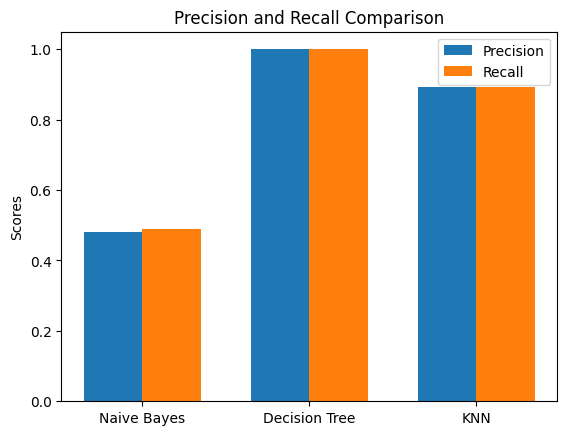

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Naive Bayes
precision_naive = precision_score(y_test, y_pred_naive, average='weighted')
recall_naive = recall_score(y_test, y_pred_naive, average='weighted')

# Decision Tree
precision_dec = precision_score(y_test, y_pred_dec, average='weighted')
recall_dec = recall_score(y_test, y_pred_dec, average='weighted')

# KNN
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print(f"Naive Bayes - Precision: {precision_naive:.2f}, Recall: {recall_naive:.2f}")
print(f"Decision Tree - Precision: {precision_dec:.2f}, Recall: {recall_dec:.2f}")
print(f"KNN - Precision: {precision_knn:.2f}, Recall: {recall_knn:.2f}")

# Bar chart comparison of precision and recall

models = ['Naive Bayes', 'Decision Tree', 'KNN']
precisions = [precision_naive, precision_dec, precision_knn]
recalls = [recall_naive, recall_dec, recall_knn]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, precisions, width, label='Precision')
rects2 = ax.bar(x + width/2, recalls, width, label='Recall')

# Add  text for labels, title and etc
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

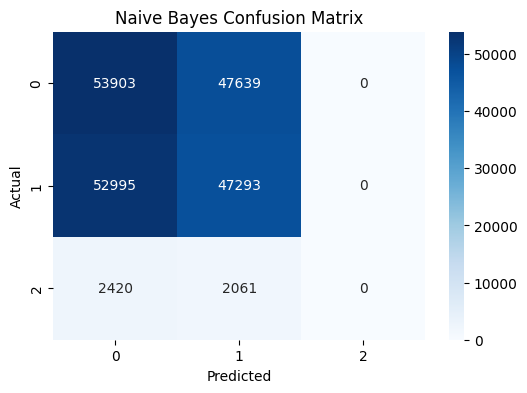

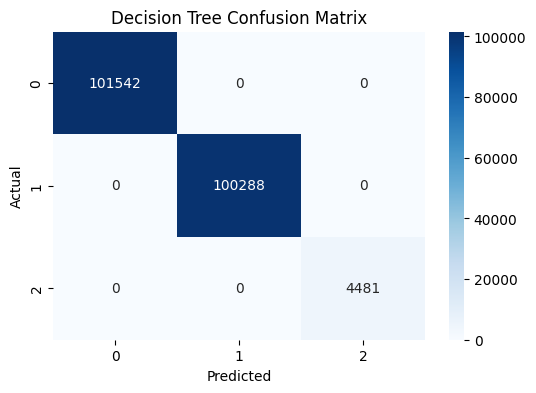

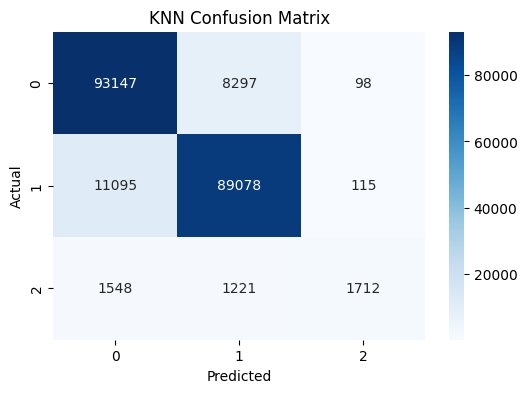

In [ ]:
# confusion matrix(for each model)
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix(y_test, y_pred_naive, 'Naive Bayes Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_dec, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

#Correlation

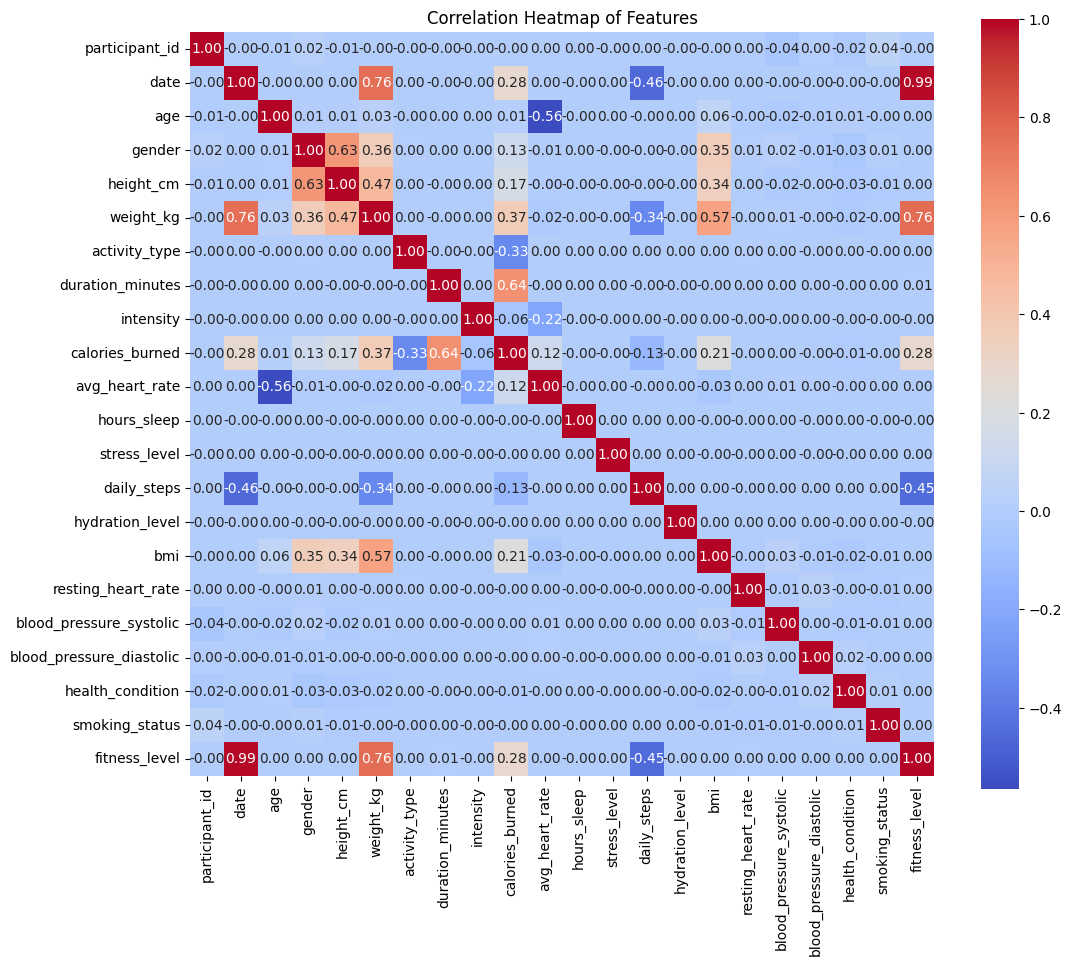

In [ ]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Features")
plt.show()